# Monkey Breed Classification using Pre-Trained MobileNet by Transfer Learning Approach


- By Sachin Saj

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
import pandas as pd
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications import MobileNet
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D

In [3]:
Train_Path = '../input/10-monkey-species/training/training'
Test_Path = '../input/10-monkey-species/validation/validation'

In [4]:
X_train = []
Y_train = []
X_test = []
Y_test = []

train_dir = []
test_dir = []

for labels in os.listdir(Train_Path):
    path_1 = os.path.join(Train_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
        X_train.append(img)
        Y_train.append(labels)
        
for labels in os.listdir(Test_Path):
    path_1 = os.path.join(Test_Path, labels)
    for images in os.listdir(path_1):
        path_2 = os.path.join(path_1, images)
        img = cv2.imread(path_2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,244), interpolation = cv2.INTER_AREA)
        X_test.append(img)
        Y_test.append(labels)

(1098, 224, 224, 3)
(1098,)
(272, 244, 224, 3)
(272,)


1098
1098
272
272


['n0' 'n1' 'n2' 'n3' 'n4' 'n5' 'n6' 'n7' 'n8' 'n9'] 
 Number of classes 10


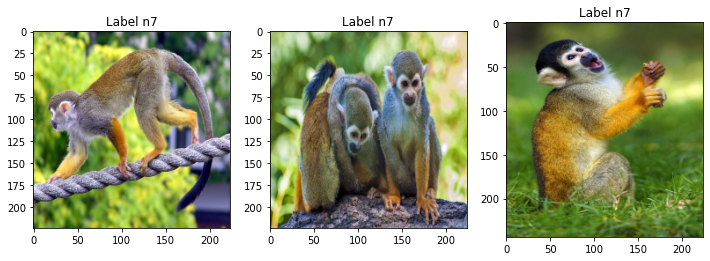

In [5]:
plt.figure(figsize=(12,12))

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print('\n')
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.title('Label'+ ' ' + str(Y_train[0]))
plt.subplot(1,3,2)
plt.imshow(X_train[6])
plt.title('Label'+ ' ' + str(Y_train[6]))
plt.subplot(1,3,3)
plt.imshow(X_test[20])
plt.title('Label'+ ' ' + str(Y_test[20]))

print('\n')
print(str(np.unique(Y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(Y_train))))

In [6]:
X_train = X_train / 255
X_test = X_test / 255

laben = LabelEncoder()
Y_train = laben.fit_transform(Y_train) # Converts the categorical label to (0,1)
Y_train = to_categorical(Y_train,10) # Converts that (0,1) in array form

Y_test = laben.fit_transform(Y_test) 
Y_test = to_categorical(Y_test,10) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1098, 224, 224, 3)
(272, 244, 224, 3)
(1098, 10)
(272, 10)


In [7]:
mobile_1 = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3),classes=1000)

17227776/17225924 [==============================] - 0s 0us/step


In [8]:
for layer in mobile_1.layers:
    layer.trainable = False
    
model_1 = Sequential()
model_1.add(mobile_1)
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 5,857,994
Trainable params: 2,629,130
Non-trainable params: 3,228,864
______________________________________

In [9]:
model_1.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [10]:
history = model_1.fit(X_train, Y_train,
                   batch_size = 16,
                   validation_data = (X_test,Y_test),
                   epochs = 20,
                   verbose = 1)

Epoch 1/20
69/69 [==============================] - 26s 377ms/step - loss: 0.6620 - accuracy: 0.7951 - val_loss: 0.1996 - val_accuracy: 0.9375
Epoch 2/20
69/69 [==============================] - 26s 370ms/step - loss: 0.1449 - accuracy: 0.9463 - val_loss: 0.1833 - val_accuracy: 0.9559
Epoch 3/20
69/69 [==============================] - 25s 357ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1904 - val_accuracy: 0.9301
Epoch 4/20
69/69 [==============================] - 26s 372ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0967 - val_accuracy: 0.9706
Epoch 5/20
69/69 [==============================] - 25s 358ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9706
Epoch 6/20
69/69 [==============================] - 26s 370ms/step - loss: 0.0024 - accuracy: 0.9982 - val_loss: 0.0822 - val_accuracy: 0.9779
Epoch 7/20
69/69 [==============================] - 25s 362ms/step - loss: 1.1763e-04 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.

In [11]:
Score = model_1.evaluate(X_test,Y_test)
print(' Test Accuracy ', Score[1])

9/9 [==============================] - 5s 586ms/step - loss: 0.0776 - accuracy: 0.9853
 Test Accuracy  0.9852941036224365


In [12]:
y_test_ = np.argmax(Y_test, axis=1)
y_pred_ = model_1.predict_classes(X_test)

In [13]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      1.00      0.98        28
           2       1.00      0.96      0.98        27
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        26
           7       0.97      1.00      0.98        28
           8       0.96      0.96      0.96        27
           9       0.96      1.00      0.98        26

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272



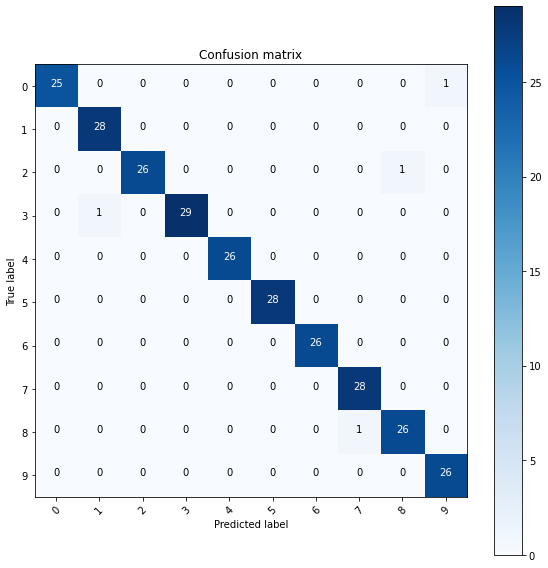

In [17]:
plt.figure(figsize=(8,8))

classes = 10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 